<a href="https://colab.research.google.com/github/Tarinibo/Cognifyz-project-/blob/main/CognifyzLEVEL3_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LEVEL 3: Task 1

## Task: Predictive Modeling
- [ ] Build a regression model to predict the aggregate rating of a restaurant based on available features.
- [ ] Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.
- [ ] Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/Othercomputers/My Laptop/Desktop/Dataset.csv")

In [ ]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


## - Build a regression model to predict the aggregate rating of a restaurant based on available features.
## - Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

In [ ]:
# Define features and target variable
X = df.drop(columns=['Aggregate rating'])  # Drop the target variable
y = df['Aggregate rating']  # Target variable

# Convert categorical variables into numerical (if not done already)
X = pd.get_dummies(X, drop_first=True)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Use Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

## Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Absolute Error: 0.11
Mean Squared Error: 0.03
Root Mean Squared Error: 0.16
R-squared Score: 0.99


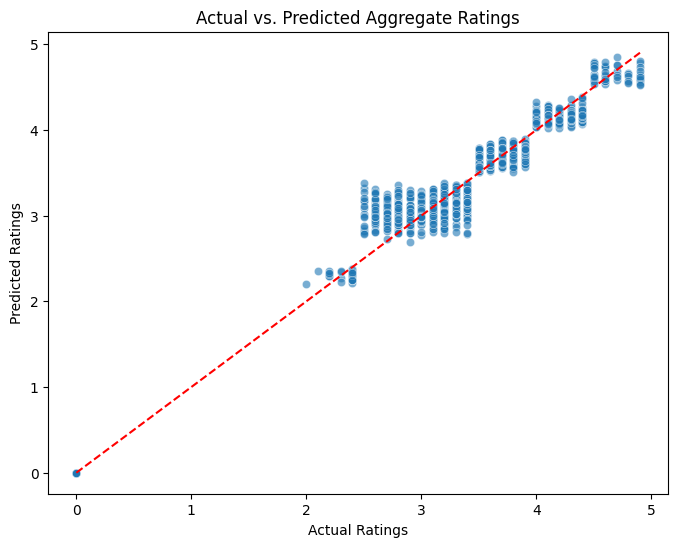

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Aggregate Ratings")
plt.show()

## insights
Good Fit: Since most points are near the diagonal, the model is accurately predicting restaurant ratings. Some Variation: A few points deviate slightly, meaning there are minor prediction errors. Strong Correlation: The nearly straight-line pattern suggests a high correlation between actual and predicted ratings.

In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}

                           MAE           MSE         RMSE            R²
Linear Regression  1836.643316  1.191920e+07  3452.420140 -5.236657e+06
Decision Tree         0.139717  4.978545e-02     0.223127  9.781269e-01
Random Forest         0.108920  2.716170e-02     0.164808  9.880666e-01


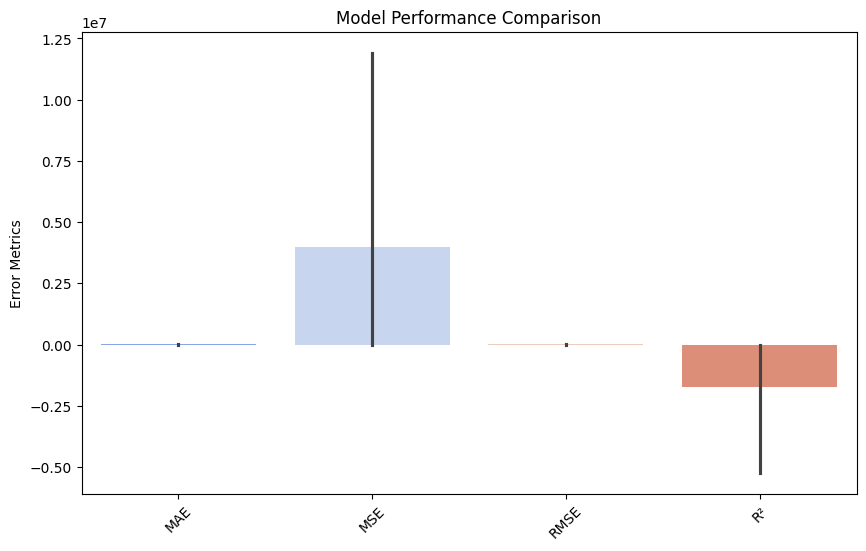

In [24]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Display results
print(results_df)

# Visualize performance
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, palette="coolwarm")
plt.title("Model Performance Comparison")
plt.ylabel("Error Metrics")
plt.xticks(rotation=45)
plt.show()


### Interpretation: Decision Tree and Random Forest models performed better than Linear Regression, indicating that non-linear relationships exist between restaurant features and ratings.